In [15]:
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
import torch
from torch import nn, optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import datasets, transforms



In [16]:
#定义Alexnet网路结构
class AlexNet(nn.Module):
    def __init__(self,num_classes):
        super(AlexNet,self).__init__()
        self.features=nn.Sequential(
            nn.Conv2d(3,64,kernel_size=11,stride=4,padding=2),#修改了这个地方，不知道为什么就对了
             # raw kernel_size=11, stride=4, padding=2. For use img size 224 * 224.
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3,stride=2),
            
            nn.Conv2d(64,192,kernel_size=5,padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3,stride=2),
        
            nn.Conv2d(192,384,kernel_size=3,padding=1),
            nn.ReLU(inplace=True),
        
            nn.Conv2d(384,256,kernel_size=3,padding=1),
            nn.ReLU(inplace=True),
        
            nn.Conv2d(256,256,kernel_size=3,padding=1),
            nn.ReLU(inplace=True),  
            nn.MaxPool2d(kernel_size=3,stride=2),)
        self.classifier=nn.Sequential(
            nn.Dropout(),
            nn.Linear(256*1*1,4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096,4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096,num_classes),)
    def forward(self,x):
        x=self.features(x)
        x=x.view(x.size(0),256*1*1)
        x=self.classifier(x)
        #return F.log_softmax(inputs, dim=3)
        return x


In [19]:
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
 
from torch import nn,optim
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
#定义一些超参数
batch_size=100
learning_rate=1e-2
num_epoches=200
#预处理
data_tf=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
#将图像转化成tensor，然后继续标准化，就是减均值，除以方差
 
#读取数据集
train_dataset=datasets.CIFAR10(root='./data',train=True,transform=data_tf,download=True)
test_dataset=datasets.CIFAR10(root='./data',train=False,transform=data_tf)
#使用内置的函数导入数据集
train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=batch_size,shuffle=False)
 
#导入网络，定义损失函数和优化方法
#model=Lenet()
#model=CNN()
model=AlexNet(10)
if torch.cuda.is_available():#是否使用cuda加速
    model=model.cuda()
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=learning_rate)
n_epochs=1
for epoch in range(n_epochs):
    total=0
    running_loss=0.0
    running_correct=0
    print("epoch {}/{}".format(epoch,n_epochs))
    print("-"*10)
    for data in train_loader:
        img,label=data
        #img=img.view(img.size(0),-1)
        img = Variable(img)
        if torch.cuda.is_available():
            img=img.cuda()
            label=label.cuda()
        else:
            img=Variable(img)
            label=Variable(label)
        out=model(img)#得到前向传播的结果
        loss=criterion(out,label)#得到损失函数
        print_loss=loss.data.item()
        optimizer.zero_grad()#归0梯度
        loss.backward()#反向传播
        optimizer.step()#优化
        running_loss+=loss.item()
        epoch+=1
        if epoch%50==0:
            print('epoch:{},loss:{:.4f}'.format(epoch,loss.data.item()))
    _, predicted = torch.max(out.data, 1)
    total += label.size(0)
    running_correct += (predicted == label).sum()
    print('第%d个epoch的识别准确率为：%d%%' % (epoch + 1, (100 * running_correct / total)))


Files already downloaded and verified
epoch 0/1
----------
epoch:50,loss:2.3018
epoch:100,loss:2.3016
epoch:150,loss:2.3039
epoch:200,loss:2.3026
epoch:250,loss:2.3013
epoch:300,loss:2.3052
epoch:350,loss:2.3011
epoch:400,loss:2.3021
epoch:450,loss:2.3034
epoch:500,loss:2.3031
第501个epoch的识别准确率为：6%


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from torchvision import transforms
 

In [2]:
transform = transforms.Compose([
    transforms.Resize(227),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

In [3]:
trainset = torchvision.datasets.CIFAR10(root='./data',train=True, download=True, transform=transform)
trainloader = DataLoader(trainset,batch_size=32,shuffle=True, num_workers=2)
 
testset = torchvision.datasets.CIFAR10(root='./data',train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)
 
classes = ('plane','car','bird','cat','deer','dog','forg','horse','ship','truck')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
def imshow(img):
    img = img/2 + 0.5
    nping = img.numpy()
    plt.imshow(np.transpose(nping, (1,2,0)))
    plt.show()

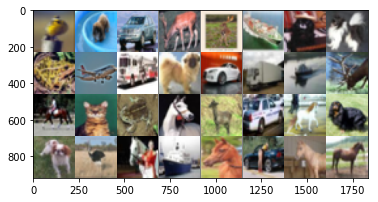

 bird   dog   car  deer  deer  ship   dog   dog  forg plane truck   dog   car truck  ship  deer horse   cat  forg horse  deer   car horse   dog   dog  bird horse  ship horse   car horse horse


In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s'%classes[labels[j]] for j in range(32)))

In [6]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.conv1 = nn.Conv2d(3,96,11,4)
        self.conv2 = nn.Conv2d(96,256,5,padding=2)
        self.conv3 = nn.Conv2d(256,384,3,padding=1)
        self.conv4 = nn.Conv2d(384,384,3,padding=1)
        self.conv5 = nn.Conv2d(384,256,3,padding=1)
        self.fc1 = nn.Linear(256*6*6,4096)
        self.fc2 = nn.Linear(4096,4096)
        self.fc3 = nn.Linear(4096,num_classes)
 
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)),(2,2))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(F.relu(self.conv5(x)),(2,2))
        x = x.view(x.size(0),256*6*6)
        x = F.dropout(F.relu(self.fc1(x)),p=0.5)
        x = F.dropout(F.relu(self.fc2(x)),p=0.5)
        x = self.fc3(x)
        return x
 

In [7]:
#device = torch.device("cuda")
#print(device)
 
net = AlexNet()
#net.to(device)
 
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(20):
 
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, lables = data
        inputs = inputs#.to(device)
        lables = lables#.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, lables)
        loss.backward()
        optimizer.step()
 
        running_loss += loss.item()
        if i % 200 == 199:
            print('[%d,%5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0
print('Finished Training')
torch.save(net, './model')
 

In [ ]:
net = torch.load('./model')
print(net)
dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s'%classes[labels[j]] for j in range(32)))

In [ ]:
images, labels = images,labels#.to(device), labels.to(device)
 
outputs = net(images)
predicted = torch.argmax(outputs,1)
print('Predicted: ',' '.join('%5s'%classes[predicted[j]] for j in range(32)))
 
 
 correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images = images#.to(device)
        labels = labels#.to(device)
        outputs = net(images)
        predicted = torch.argmax(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
 
 print('Accuracy of the network on the 50000 train images: %d %%'%(100*correct/total))

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images#.to(device)
        labels = labels#.to(device)
        outputs = net(images)
        predicted = torch.argmax(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
 
 print('Accuracy of the network on the 10000 test images: %d %%'%(100*correct/total))

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images#.to(device)
        labels = labels#.to(device)
        outputs = net(images)
        predicted = torch.argmax(outputs.data,1)
        c = (predicted== labels)
        if len(c) == 16:
            for i in range(16):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += c[i].item()
        else:
            for i in range(32):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
for i in range(10):
    print('Accuracy of %5s : %2d %%'%(classes[i], 100*class_correct[i]/class_total[i]))

In [4]:
import torch
import numpy as np

a = torch.ones(8, 8,8)
b = torch.nn.functional.max_pool2d(a,(2,2))
print(b)

In [16]:
a = torch.ones(8, 8,8) 
b = torch.nn.functional.max_pool2d(a,(2,2))
print(b)

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])
